In [1]:
%matplotlib inline

In [2]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

In [3]:
# access demographic files (dataframe created in other notebook)
park=pd.read_csv('PD_data.csv', index_col=["Unnamed: 0"])
control=pd.read_csv('CO_data.csv', index_col=["Unnamed: 0"])

In [4]:
for i in range(1, 8):
    print(str(i).zfill(2))

01
02
03
04
05
06
07


## PD patients 
#### Ga - Galit Yogev et al (dual tasking in PD; Eur J Neuro, 2005)

In [5]:
#iterate through the file names in the Ga_PD folder 
patients={}
for n in range(5, 34):
    patients[f"patient{n}"] = pd.read_csv(r'C:\Users\Bio Guest\Documents\Datasets\Gait_PD\Ga_PD\GaPt' + str(n).zfill(2) + '_01.txt', sep='\t', header=None, names=['time','l1','l2','l3','l4','l5','l6','l7','l8','r1','r2','r3','r4','r5','r6','r7','r8','total_l','total_r'])

In [6]:
patients["patient33"]

time      l1      l2     l3     l4     l5      l6      l7     l8  \
0        0.0000  209.33   49.50  47.85  34.98  13.97   45.21   75.35  26.40   
1        0.0100  209.33   49.50  47.85  34.98  13.97   45.21   75.35  26.40   
2        0.0200  217.36   55.44  53.57  37.62  13.97   50.82   81.18  30.80   
3        0.0300  225.50   59.40  57.42  43.01  13.97   56.54   87.01  30.80   
4        0.0400  234.96   64.13  59.40  45.76  17.38   62.04   92.73  35.20   
...         ...     ...     ...    ...    ...    ...     ...     ...    ...   
12114  121.1315  209.33   83.27  55.55  68.53  17.38   86.79  113.08  55.00   
12115  121.1415  217.36   90.42  59.40  74.58  20.90   95.04  118.80  59.40   
12116  121.1515  222.75   97.57  64.13  83.60  20.90  100.54  124.52  63.80   
12117  121.1615  225.50  104.72  66.44  89.65  24.42  108.79  130.24  66.11   
12118  121.1715  228.58  109.45  68.86  98.67  24.42  114.51  135.96  70.51   

          r1     r2     r3     r4    r5      r6      r7      r8  total_l  \
0      57.97  12.87  15.84  42.35  5.39  202.18  199.76  224.40   502.59   
1      57.97  12.87  15.84  42.35  5.39  202.18  199.76  224.40   502.59   
2      55.55  11.00  15.84  32.23  5.39  194.81  197.56  229.35   540.76   
3      50.71   9.13  14.08  24.20  3.63  182.49  193.16  231.88   573.65   
4      48.29   9.13  12.32  20.13  3.63  167.75  188.76  236.83   611.60   
...      ...    ...    ...    ...   ...     ...     ...     ...      ...   
12114   0.00   0.00   0.00   8.03  3.63  165.33  150.59  194.48   688.93   
12115   0.00   0.00   0.00   8.03  3.63  136.29  146.08  189.53   735.90   
12116   0.00   0.00   0.00   8.03  3.63  112.09  139.15  179.52   777.81   
12117   0.00   0.00   0.00   6.05  3.63   95.37  127.71  167.20   815.87   
12118   0.00   0.00   0.00   6.05  0.00   81.07  113.85  153.34   850.96   

       total_r  
0       760.76  
1       760.76  
2       741.73  
3       709.28  
4       686.84  
...        ...  
12114   522.06  
12115   483.56  
12116   442.42  
12117   399.96  
12118   354.31  

[12119 rows x 19 columns]

In [7]:
#drop unwanted rows 
for n in range(5, 34):
    patients[f'patient{n}'].drop(patients[f'patient{n}'].loc[:,'l1':'r8'], axis=1, inplace=True)

In [8]:
#add subject id number column 
for id in range(5, 34):
    patients[f'patient{id}']['id'] = [id]*len(patients[f'patient{id}'])

Text(0, 0.5, 'Total force')

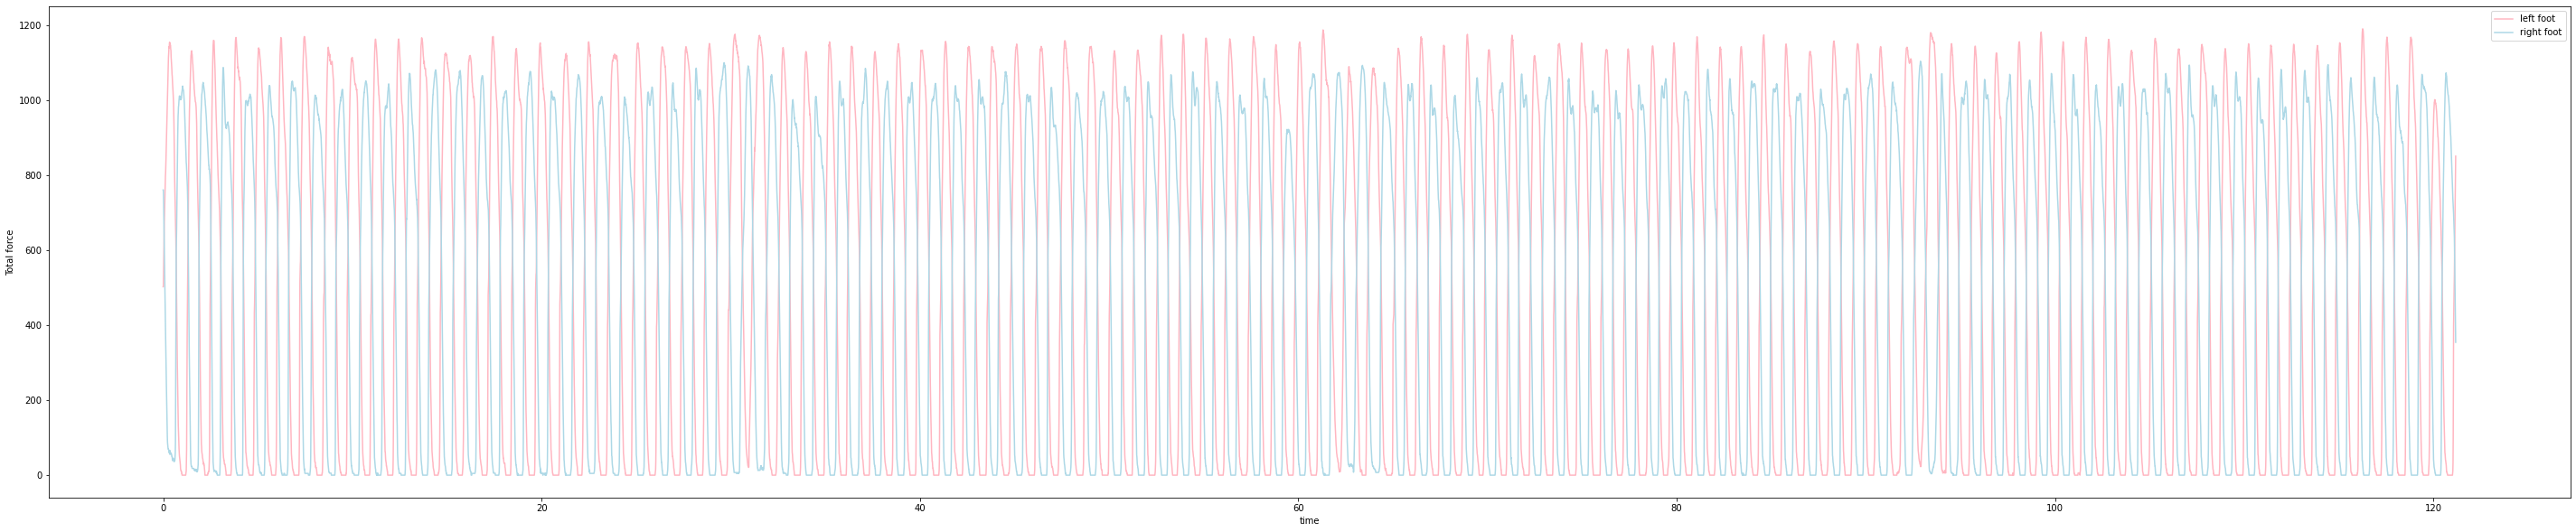

In [9]:
#patients["patient33"]=patients["patient33"].iloc[::100]
fig, axes = plt.subplots(figsize=(50,10))
sns.lineplot(x='time',y='total_l',data=patients["patient33"],color='lightpink',label="left foot")
sns.lineplot(x='time',y='total_r',data=patients["patient33"],color='lightblue',label="right foot")
plt.ylabel('Total force')

In [10]:
av=pd.concat(patients,axis=1)

In [11]:
av.columns = av.columns.get_level_values(1)

In [12]:
av.drop(['id'],axis=1,inplace=True)

In [13]:
av['Time']=av['time'].mean(axis=1)
av['av_l_force']=av['total_l'].mean(axis=1)
av['av_r_force']=av['total_r'].mean(axis=1)

In [14]:
#access data from every 100th row i.e. every second and select only the last 3 columns 
ga_pd=av.iloc[::200,-3:]

In [15]:
ga_pd

Time  av_l_force  av_r_force
0        0.0000  496.244138  476.379655
200      1.9999  383.960690  515.941724
400      3.9997  481.826552  410.478276
600      5.9996  487.216552  425.445862
800      7.9994  426.098276  449.877241
...         ...         ...         ...
11200  111.9922  467.014483  487.865172
11400  113.9920  601.559655  395.916552
11600  115.9919  378.324138  550.110000
11800  117.9917  278.061034  661.684138
12000  119.9916  376.856207  553.417586

[61 rows x 3 columns]

(0.0, 121.0)

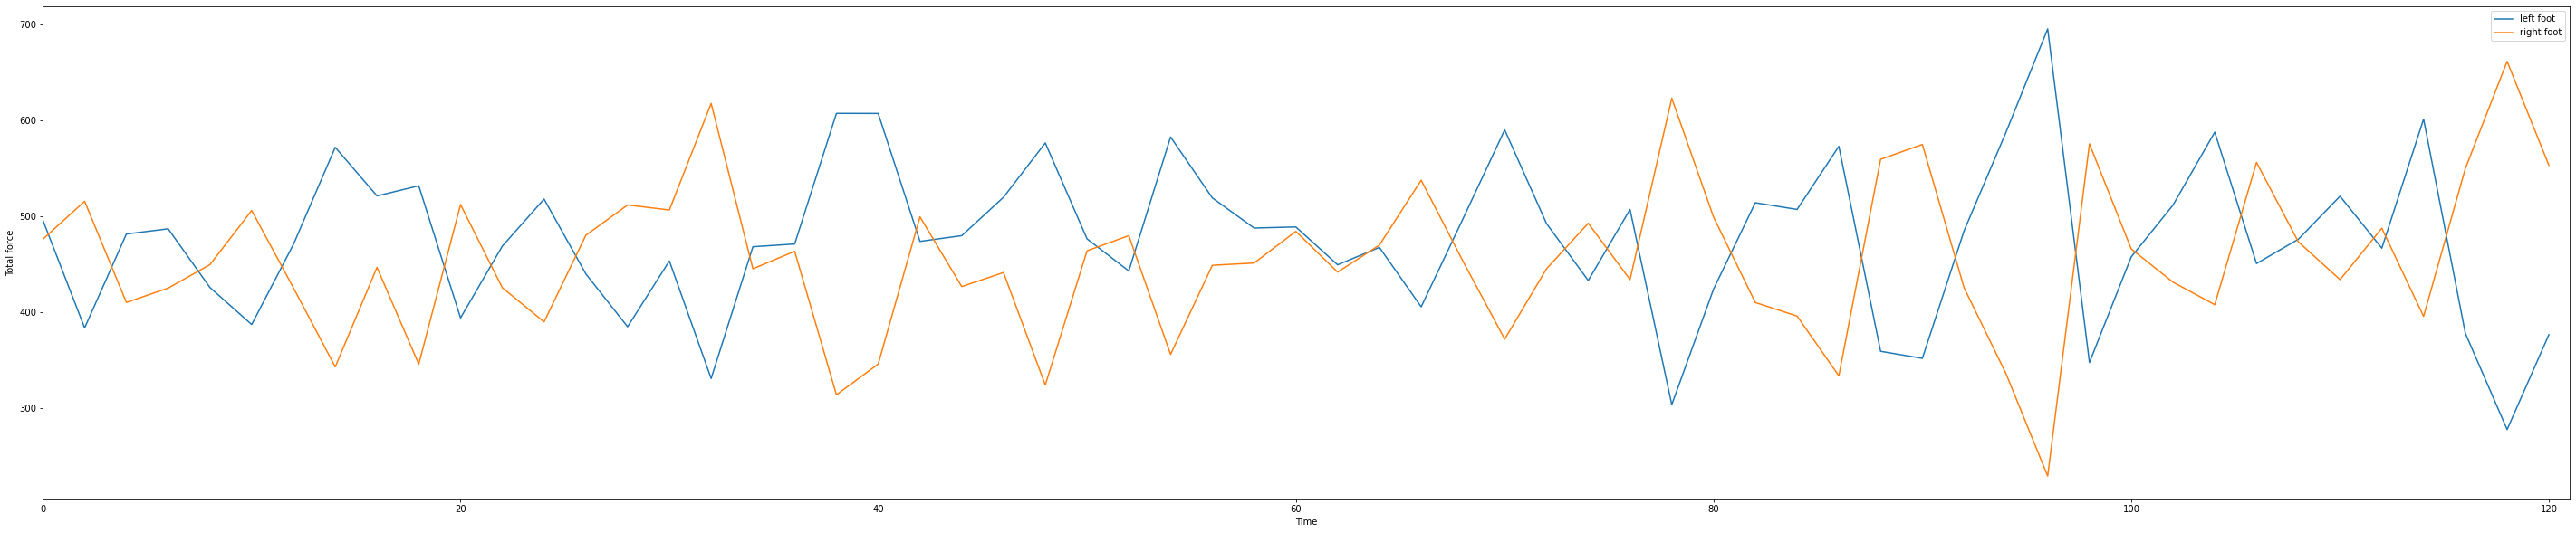

In [16]:
fig, axes = plt.subplots(figsize=(50,10))
sns.lineplot(x='Time',y='av_l_force',data=ga_pd,label="left foot")
sns.lineplot(x='Time',y='av_r_force',data=ga_pd,label="right foot")
plt.ylabel('Total force')
plt.xlim(0,121)

In [47]:
%matplotlib notebook

<IPython.core.display.Javascript object>


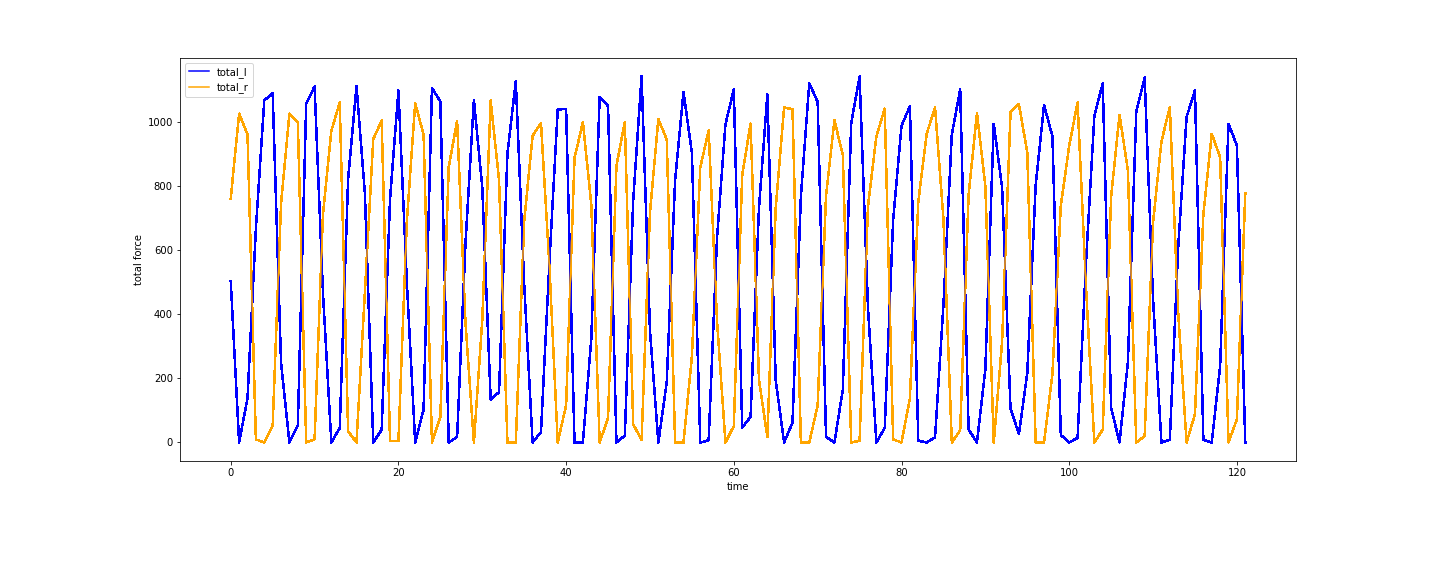

In [51]:
#animate force on left and right foot over 2 min period (specific subject)
color = ['blue', 'orange']
fig = plt.figure(figsize=(20,8))
plt.subplots_adjust(bottom = 0.2, top = 0.9) #ensuring the dates (on the x-axis) fit in the screen
plt.ylabel('total force')
plt.xlabel('time')
def gaparkinsons(i=int):
    a=patients['patient33'].iloc[::100,:3] #specific patient number used 
    plt.legend(a.columns[1:],loc='upper left')
    p = plt.plot(a[:i].time,a[:i].values[:,1:]) #only returns the dataset, up to the point i
    for i in range(0,2):
        p[i].set_color(color[i]) #set the colour of each curve


ani= FuncAnimation(fig, gaparkinsons, interval = 500, repeat=False)
plt.show()



#### Ju – Hausdorff et al (RAS in PD; Eur J Neuro, 2007)

In [19]:
#iterate through the file names in the Ju_PD folder 
patientss={}
for n in range(1, 30):
    patientss[f"patient{n}"] = pd.read_csv(r'C:\Users\Bio Guest\Documents\Datasets\Gait_PD\Ju_PD\JuPt' + str(n).zfill(2) + '_01.txt', sep='\t', header=None, names=['time','l1','l2','l3','l4','l5','l6','l7','l8','r1','r2','r3','r4','r5','r6','r7','r8','total_l','total_r'])

In [20]:
for n in range(1, 30):
    patientss[f'patient{n}'].drop(patientss[f'patient{n}'].loc[:,'l1':'r8'], axis=1, inplace=True)
for id in range(1, 30):
    patientss[f'patient{id}']['id'] = [id]*len(patientss[f'patient{id}'])

Text(0, 0.5, 'Total force')

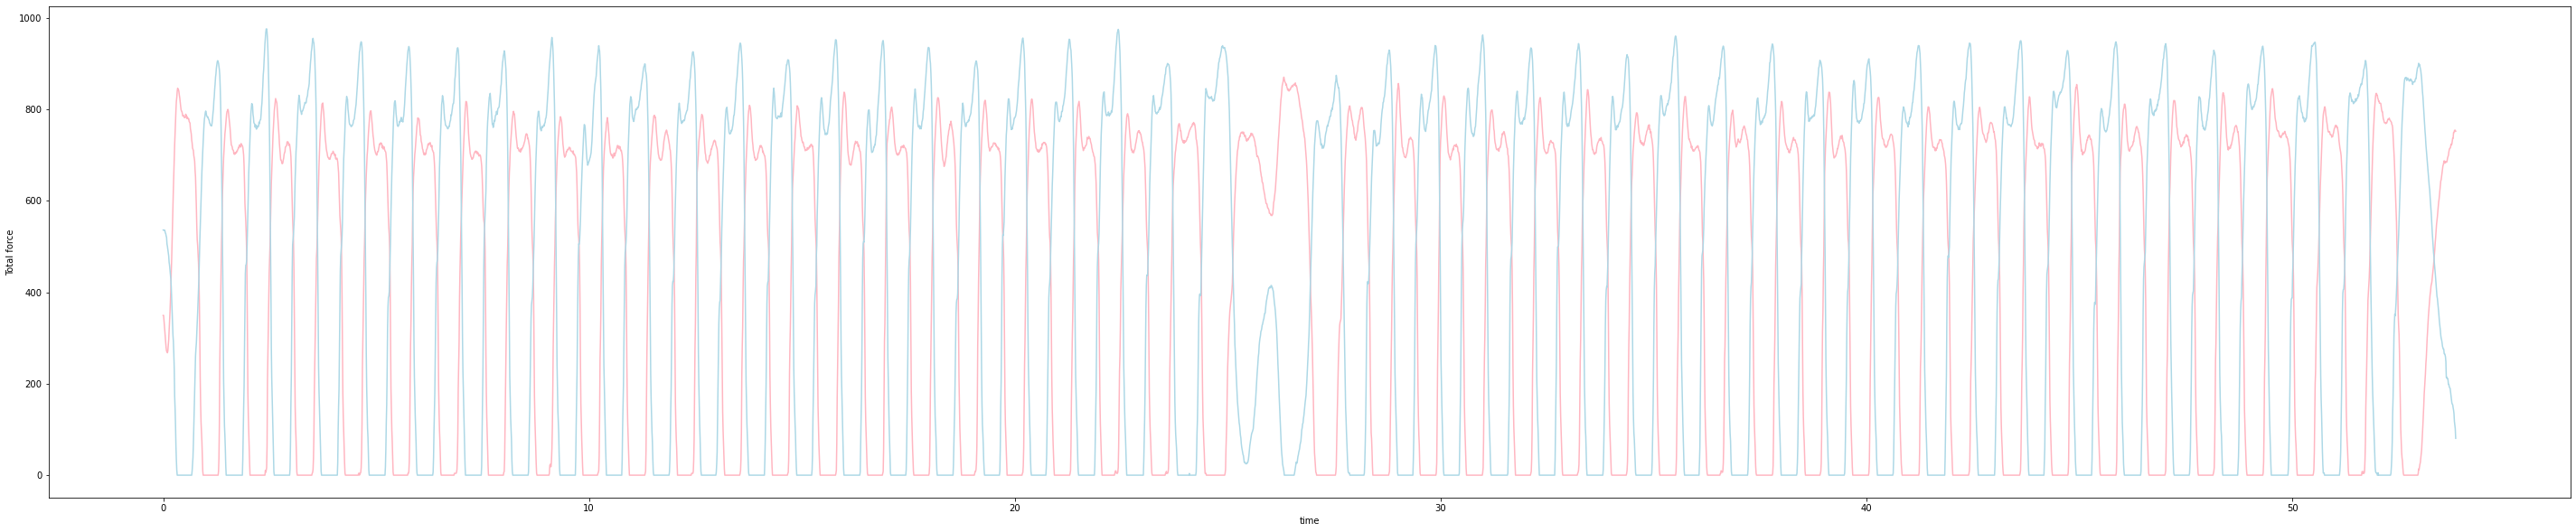

In [21]:
#patientss["patient3"]=patientss["patient3"].iloc[::100]
fig, axes = plt.subplots(figsize=(50,10))
sns.lineplot(x='time',y='total_l',data=patientss["patient3"],color='lightpink')
sns.lineplot(x='time',y='total_r',data=patientss["patient3"],color='lightblue')
plt.ylabel('Total force')

In [22]:
av1=pd.concat(patientss,axis=1)
av1.columns = av1.columns.get_level_values(1)
av1.drop(['id'],axis=1,inplace=True)
av1['Time']=av1['time'].mean(axis=1)
av1['av_l_force']=av1['total_l'].mean(axis=1)
av1['av_r_force']=av1['total_r'].mean(axis=1)

In [23]:
ju_pd=av1.iloc[::200,-3:]
ju_pd

Time  av_l_force  av_r_force
0        0.0000  548.937931  520.971379
200      1.9999  500.723793  362.150345
400      3.9997  402.247241  445.386207
600      5.9996  431.973793  438.964483
800      7.9994  451.788966  396.898966
...         ...         ...         ...
25400  253.9822  741.840000   79.750000
25600  255.9821  620.070000  310.310000
25800  257.9819    0.000000  894.960000
26000  259.9818  631.400000   56.540000
26200  261.9817  908.490000    0.000000

[132 rows x 3 columns]

(0.0, 121.0)

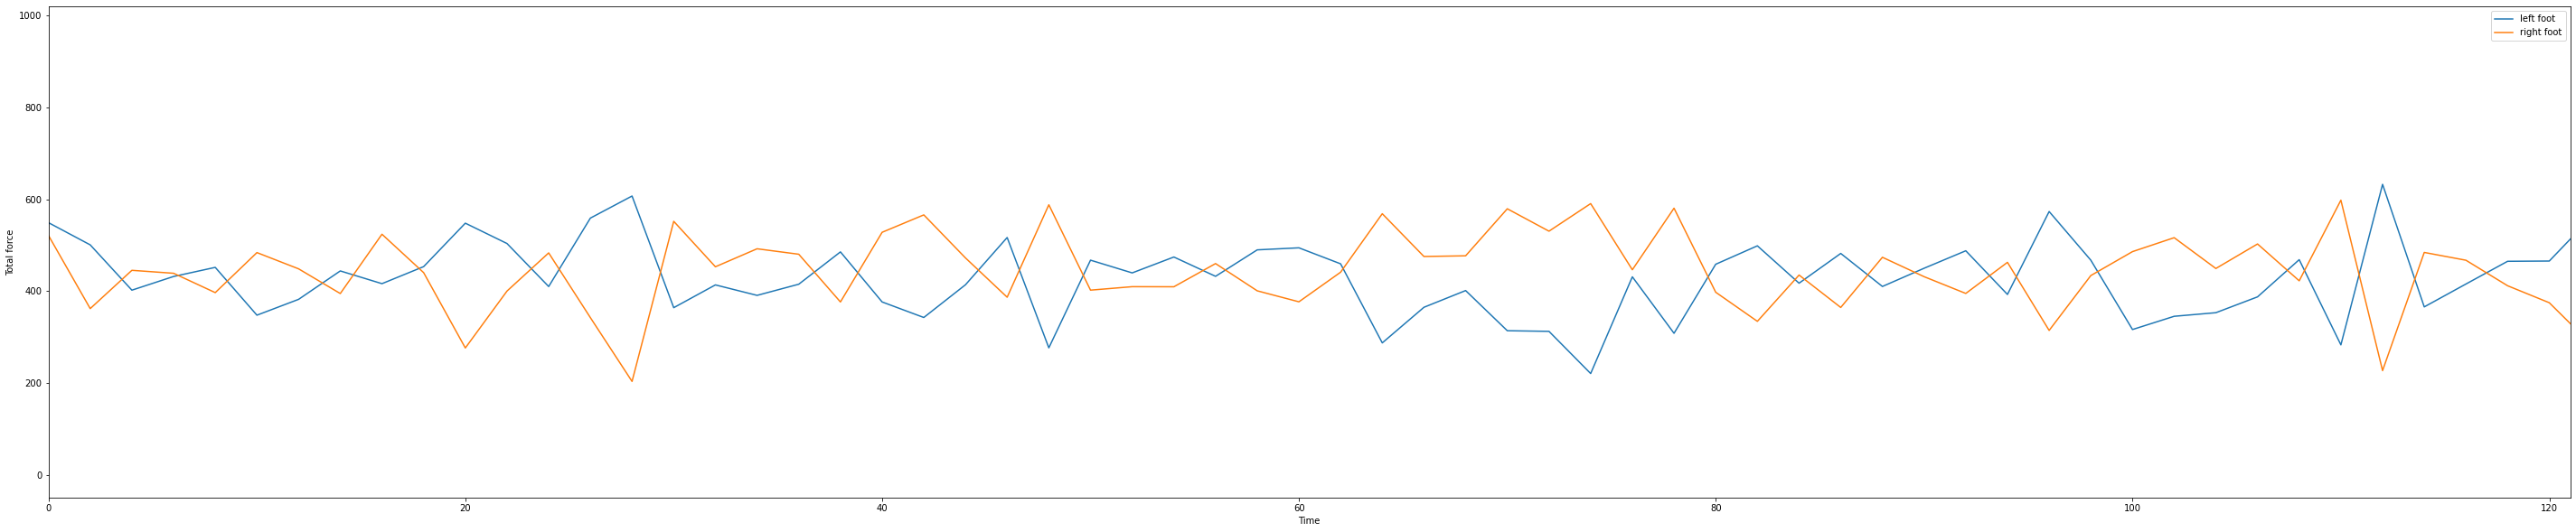

In [24]:
fig, axes = plt.subplots(figsize=(50,10))
sns.lineplot(x='Time',y='av_l_force',data=ju_pd,label="left foot")
sns.lineplot(x='Time',y='av_r_force',data=ju_pd,label="right foot")
plt.ylabel('Total force')
plt.xlim(0,121)

#### Si - Silvi Frenkel-Toledo et al (Treadmill walking in PD; Mov Disorders,2005)


In [25]:
patientsss={}
for n in range(5, 40):
    patientsss[f"patient{n}"] = pd.read_csv(r'C:\Users\Bio Guest\Documents\Datasets\Gait_PD\Si_PD\SiPt' + str(n).zfill(2) + '_01.txt', sep='\t', header=None, names=['time','l1','l2','l3','l4','l5','l6','l7','l8','r1','r2','r3','r4','r5','r6','r7','r8','total_l','total_r'])

In [26]:
for n in range(5, 40):
    patientsss[f'patient{n}'].drop(patientsss[f'patient{n}'].loc[:,'l1':'r8'], axis=1, inplace=True)
for id in range(5, 40):
    patientsss[f'patient{id}']['id'] = [id]*len(patientsss[f'patient{id}'])

Text(0, 0.5, 'Total force')

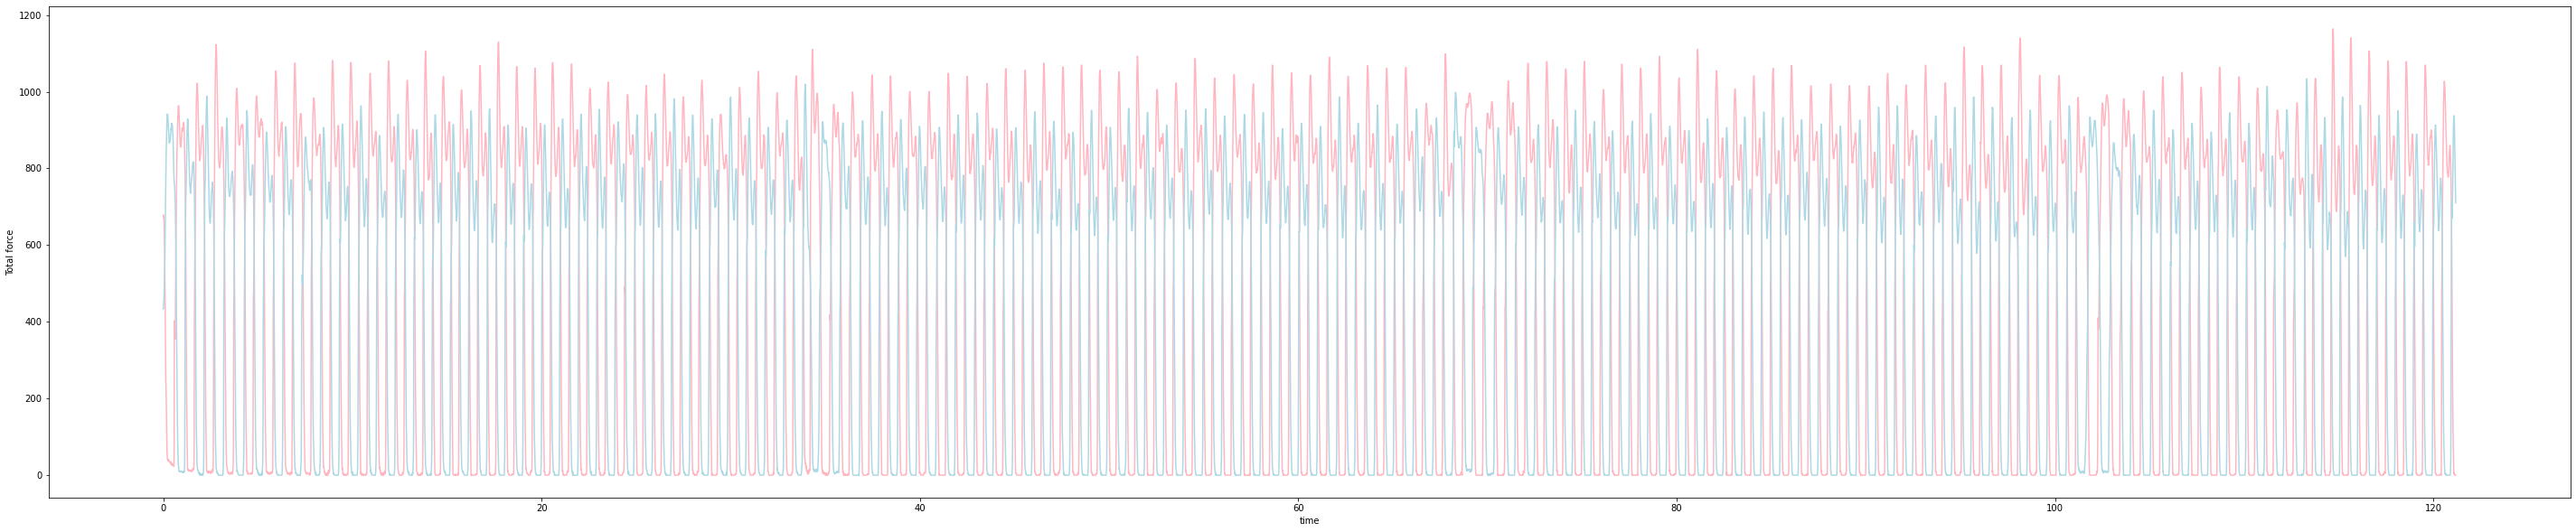

In [27]:
#patientsss["patient39"]=patientsss["patient39"].iloc[::100]
fig, axes = plt.subplots(figsize=(50,10))
sns.lineplot(x='time',y='total_l',data=patientsss["patient39"],color='lightpink')
sns.lineplot(x='time',y='total_r',data=patientsss["patient39"],color='lightblue')
plt.ylabel('Total force')

In [28]:
av2=pd.concat(patientsss,axis=1)
av2.columns = av2.columns.get_level_values(1)
av2.drop(['id'],axis=1,inplace=True)
av2['Time']=av2['time'].mean(axis=1)
av2['av_l_force']=av2['total_l'].mean(axis=1)
av2['av_r_force']=av2['total_r'].mean(axis=1)

(0.0, 121.0)

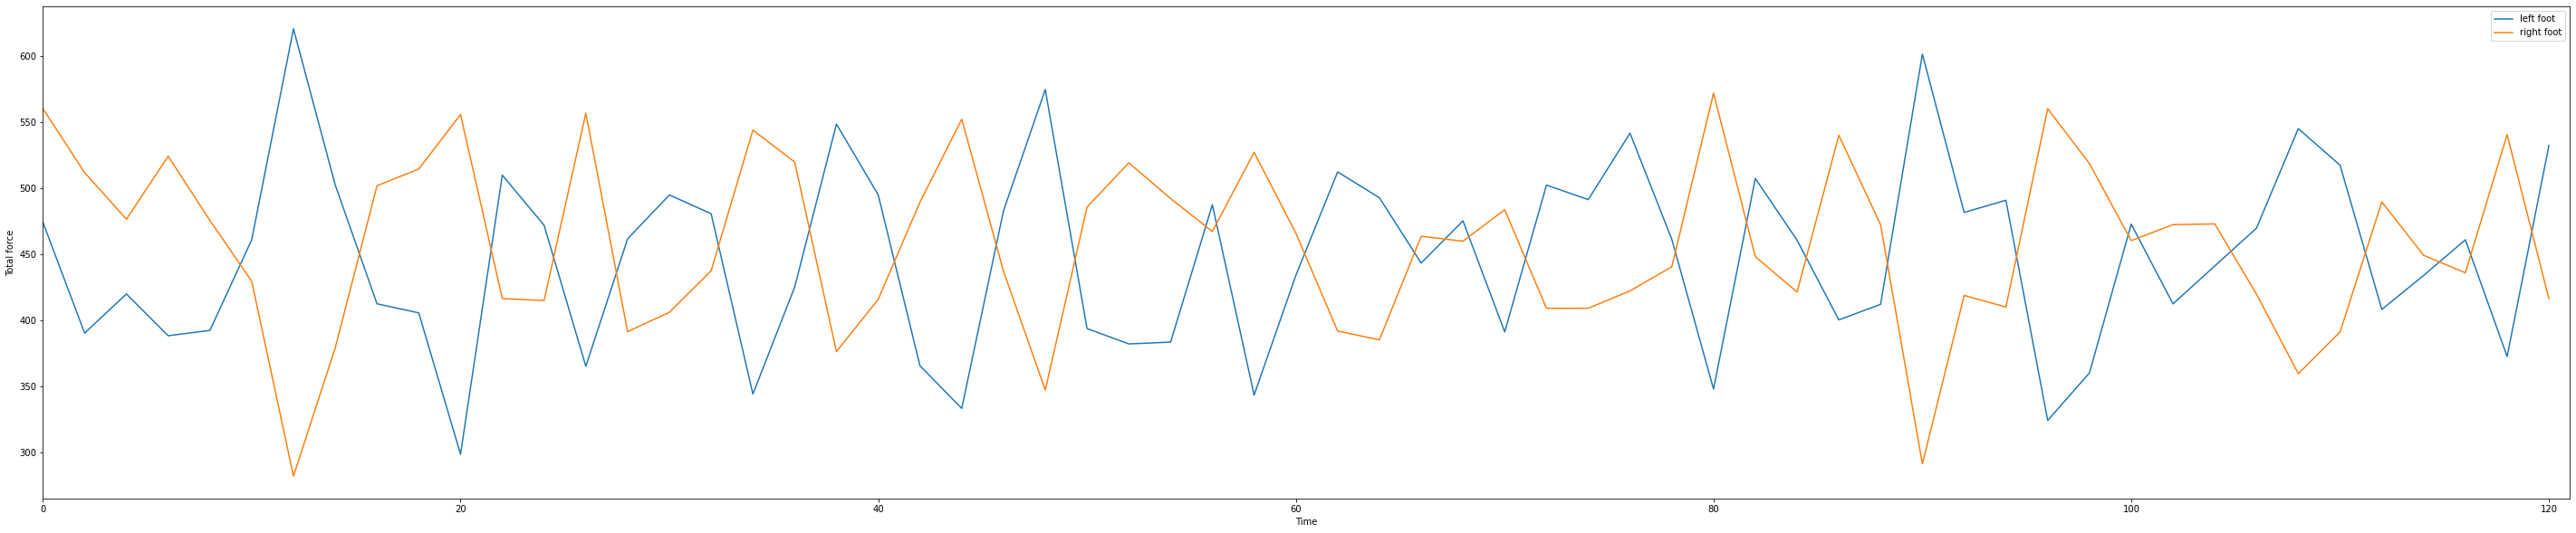

In [29]:
si_pd=av2.iloc[::200,-3:]
fig, axes = plt.subplots(figsize=(50,10))
sns.lineplot(x='Time',y='av_l_force',data=si_pd,label="left foot")
sns.lineplot(x='Time',y='av_r_force',data=si_pd,label="right foot")
plt.ylabel('Total force')
plt.xlim(0,121)

## Healthy patients 
#### Ga - Galit Yogev et al (dual tasking in PD; Eur J Neuro, 2005)

In [30]:
controls={}
for n in range(1, 19):
    controls[f"control{n}"] = pd.read_csv(r'C:\Users\Bio Guest\Documents\Datasets\Gait_PD\Ga_CO\GaCo' + str(n).zfill(2) + '_01.txt', sep='\t', header=None, names=['time','l1','l2','l3','l4','l5','l6','l7','l8','r1','r2','r3','r4','r5','r6','r7','r8','total_l','total_r'])

In [31]:
for n in range(1, 19):
    controls[f'control{n}'].drop(controls[f'control{n}'].loc[:,'l1':'r8'], axis=1, inplace=True)
for id in range(1, 19):
    controls[f'control{id}']['id'] = [id]*len(controls[f'control{id}'])

Text(0, 0.5, 'Total force')

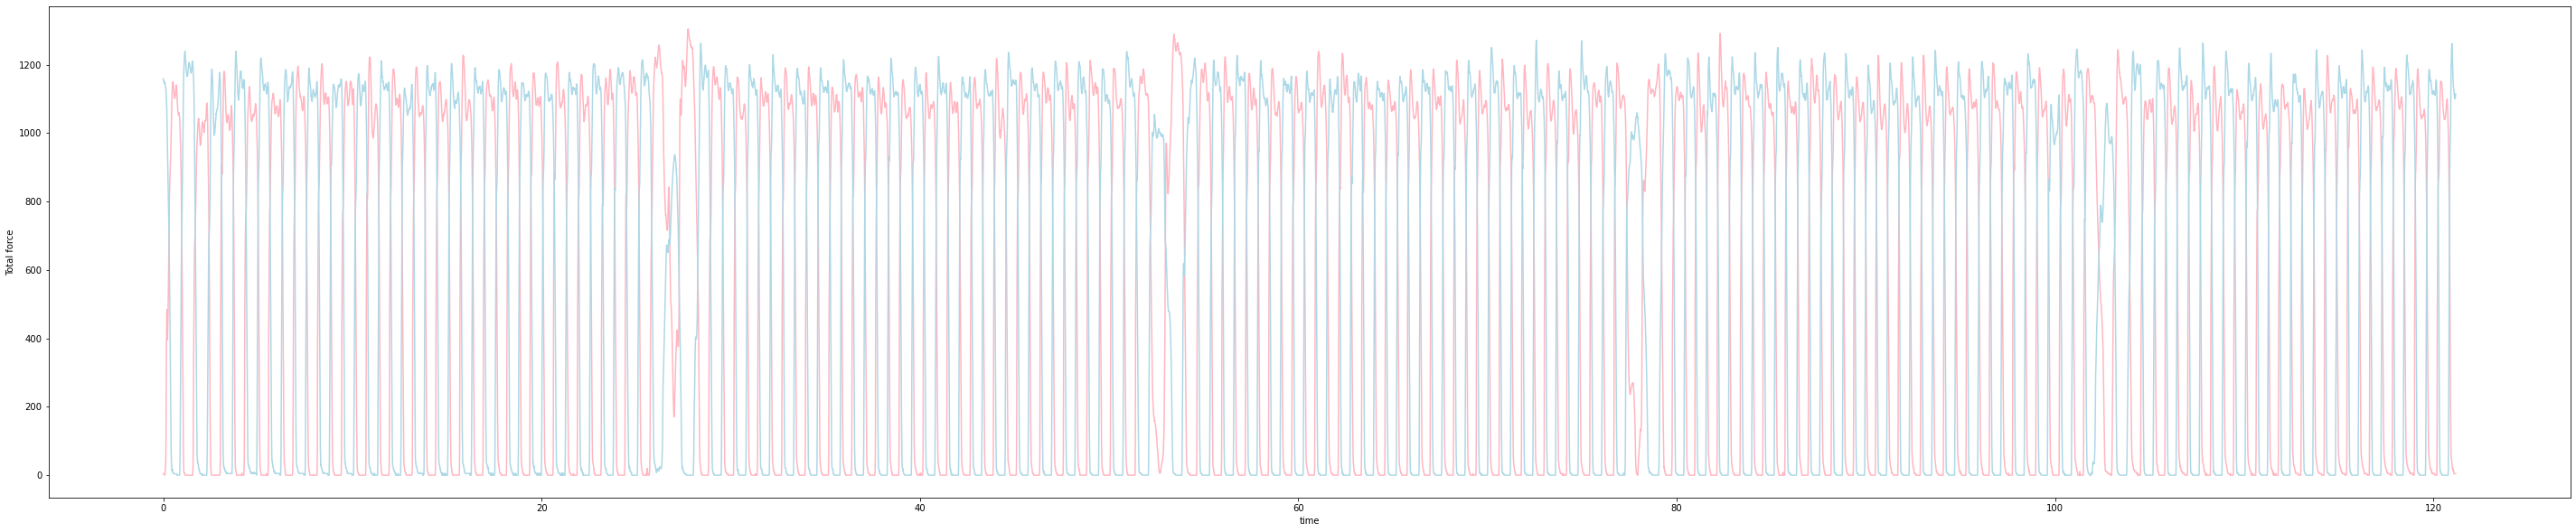

In [32]:
fig, axes = plt.subplots(figsize=(50,10))
sns.lineplot(x='time',y='total_l',data=controls["control3"],color='lightpink')
sns.lineplot(x='time',y='total_r',data=controls["control3"],color='lightblue')
plt.ylabel('Total force')

In [33]:
av3=pd.concat(controls,axis=1)
av3.columns = av3.columns.get_level_values(1)
av3.drop(['id'],axis=1,inplace=True)
av3['Time']=av3['time'].mean(axis=1)
av3['av_l_force']=av3['total_l'].mean(axis=1)
av3['av_r_force']=av3['total_r'].mean(axis=1)

(0.0, 121.0)

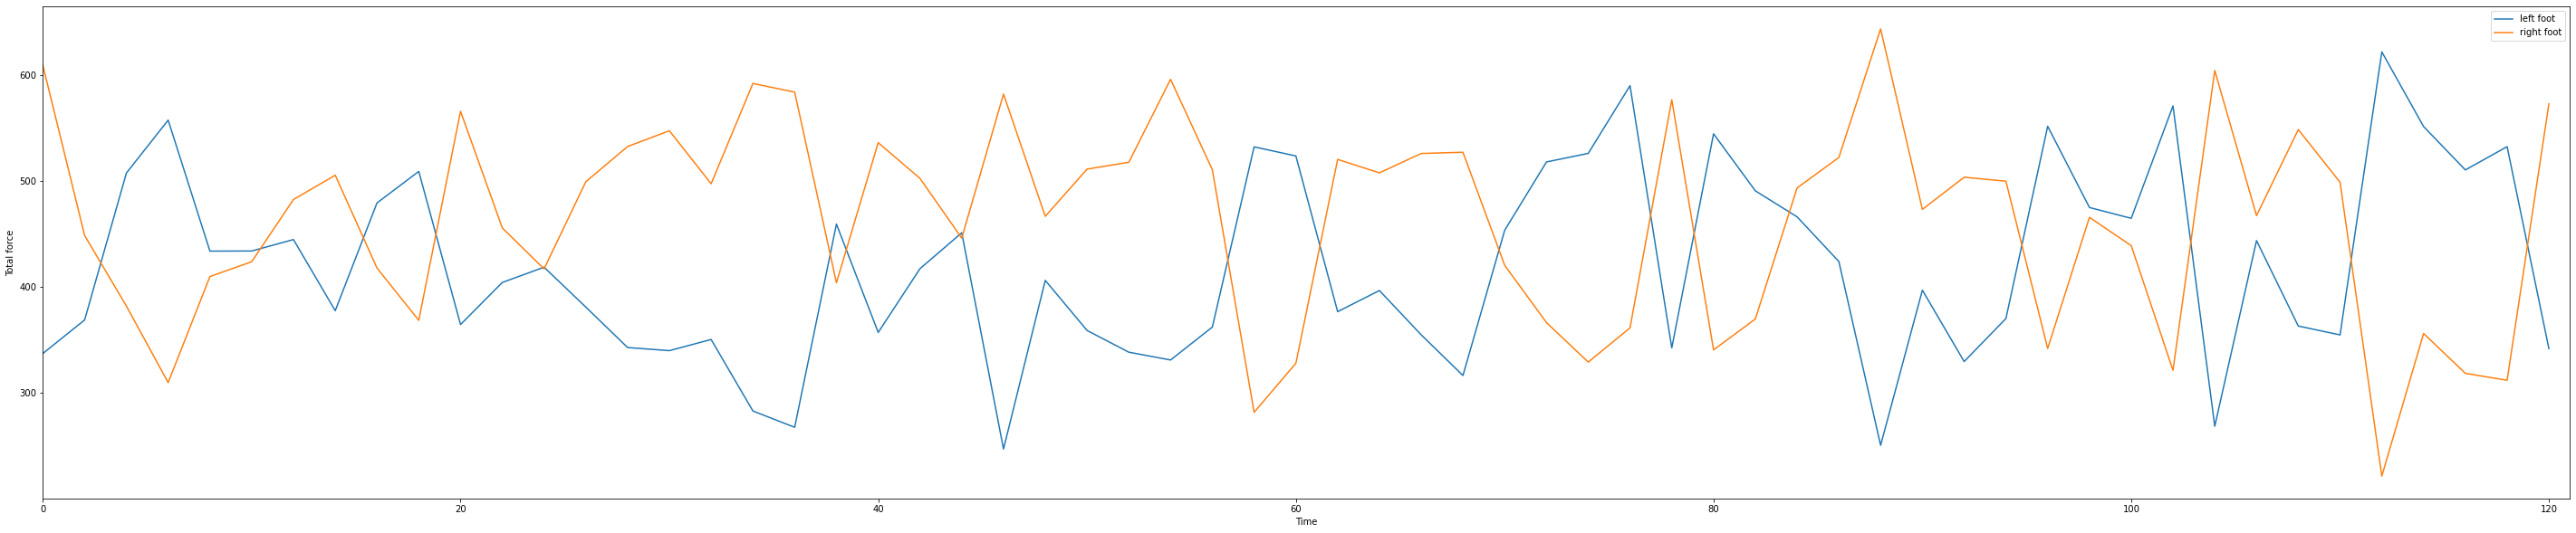

In [34]:
ga_co=av3.iloc[::200,-3:]
fig, axes = plt.subplots(figsize=(50,10))
sns.lineplot(x='Time',y='av_l_force',data=ga_co,label="left foot")
sns.lineplot(x='Time',y='av_r_force',data=ga_co,label="right foot")
plt.ylabel('Total force')
plt.xlim(0,121)

#### Ju – Hausdorff et al (RAS in PD; Eur J Neuro, 2007)

In [35]:
controlss={}
for n in range(1, 27):
    controlss[f"control{n}"] = pd.read_csv(r'C:\Users\Bio Guest\Documents\Datasets\Gait_PD\Ju_CO\JuCo' + str(n).zfill(2) + '_01.txt', sep='\t', header=None, names=['time','l1','l2','l3','l4','l5','l6','l7','l8','r1','r2','r3','r4','r5','r6','r7','r8','total_l','total_r'])

In [36]:
for n in range(1, 27):
    controlss[f'control{n}'].drop(controlss[f'control{n}'].loc[:,'l1':'r8'], axis=1, inplace=True)
for id in range(1, 27):
    controlss[f'control{id}']['id'] = [id]*len(controlss[f'control{id}'])

Text(0, 0.5, 'Total force')

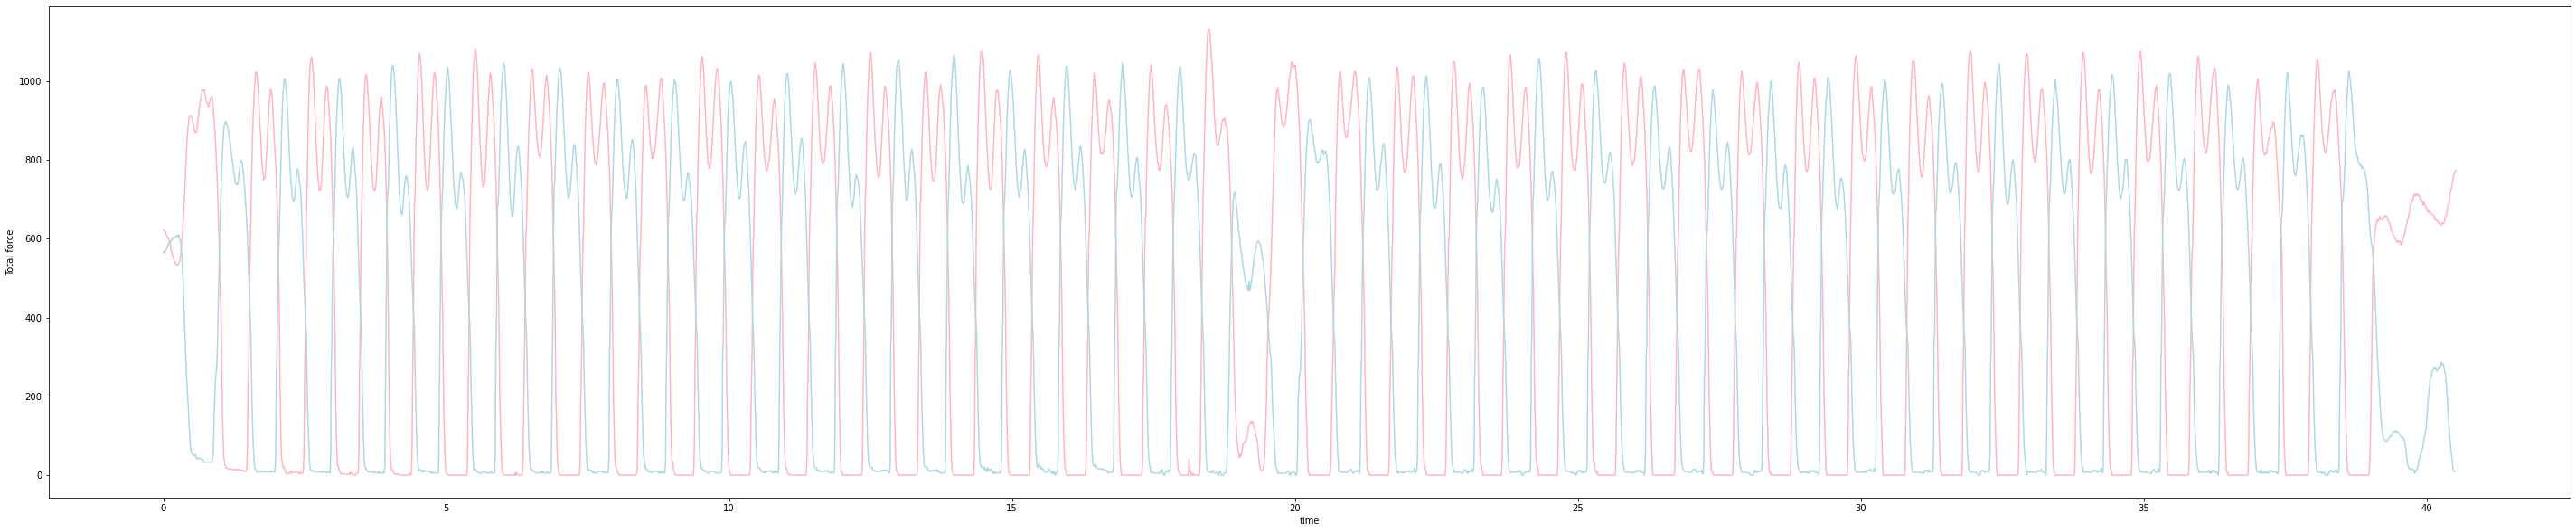

In [37]:
fig, axes = plt.subplots(figsize=(50,10))
sns.lineplot(x='time',y='total_l',data=controlss["control3"],color='lightpink')
sns.lineplot(x='time',y='total_r',data=controlss["control3"],color='lightblue')
plt.ylabel('Total force')

In [38]:
av4=pd.concat(controlss,axis=1)
av4.columns = av4.columns.get_level_values(1)
av4.drop(['id'],axis=1,inplace=True)
av4['Time']=av4['time'].mean(axis=1)
av4['av_l_force']=av4['total_l'].mean(axis=1)
av4['av_r_force']=av4['total_r'].mean(axis=1)

(0.0, 121.0)

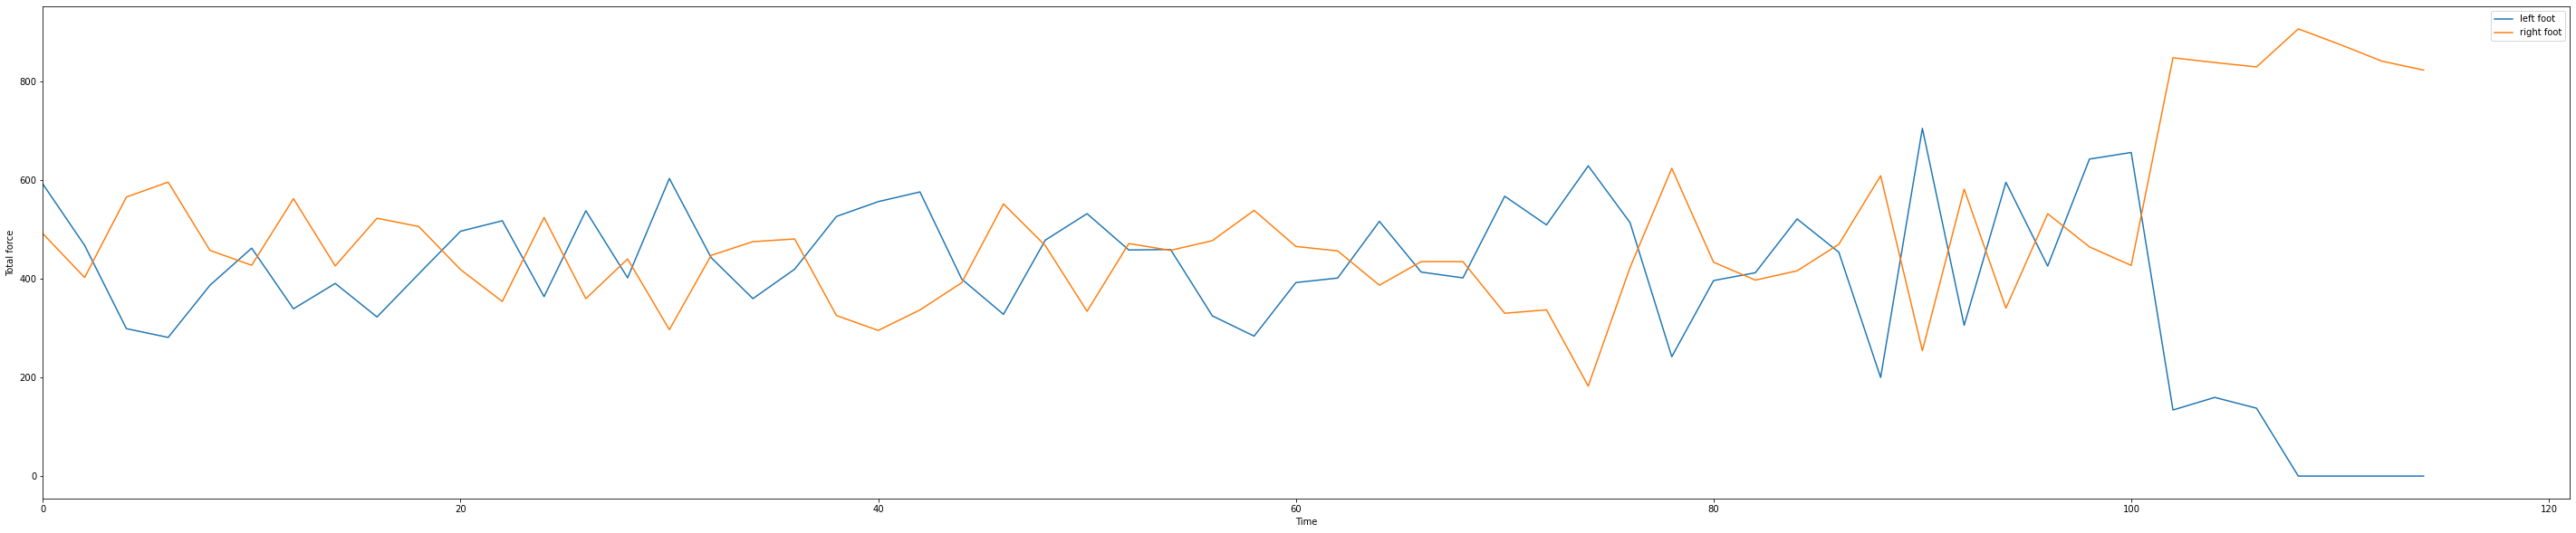

In [39]:
ju_co=av4.iloc[::200,-3:]
fig, axes = plt.subplots(figsize=(50,10))
sns.lineplot(x='Time',y='av_l_force',data=ju_co,label="left foot")
sns.lineplot(x='Time',y='av_r_force',data=ju_co,label="right foot")
plt.ylabel('Total force')
plt.xlim(0,121)

#### Si - Silvi Frenkel-Toledo et al (Treadmill walking in PD; Mov Disorders,2005)


In [40]:
controlsss={}
for n in range(2, 31):
    controlsss[f"control{n}"] = pd.read_csv(r'C:\Users\Bio Guest\Documents\Datasets\Gait_PD\Si_CO\SiCo' + str(n).zfill(2) + '_01.txt', sep='\t', header=None, names=['time','l1','l2','l3','l4','l5','l6','l7','l8','r1','r2','r3','r4','r5','r6','r7','r8','total_l','total_r'])

In [41]:
for n in range(2, 31):
    controlsss[f'control{n}'].drop(controlsss[f'control{n}'].loc[:,'l1':'r8'], axis=1, inplace=True)
for id in range(2, 31):
    controlsss[f'control{id}']['id'] = [id]*len(controlsss[f'control{id}'])

Text(0, 0.5, 'Total force')

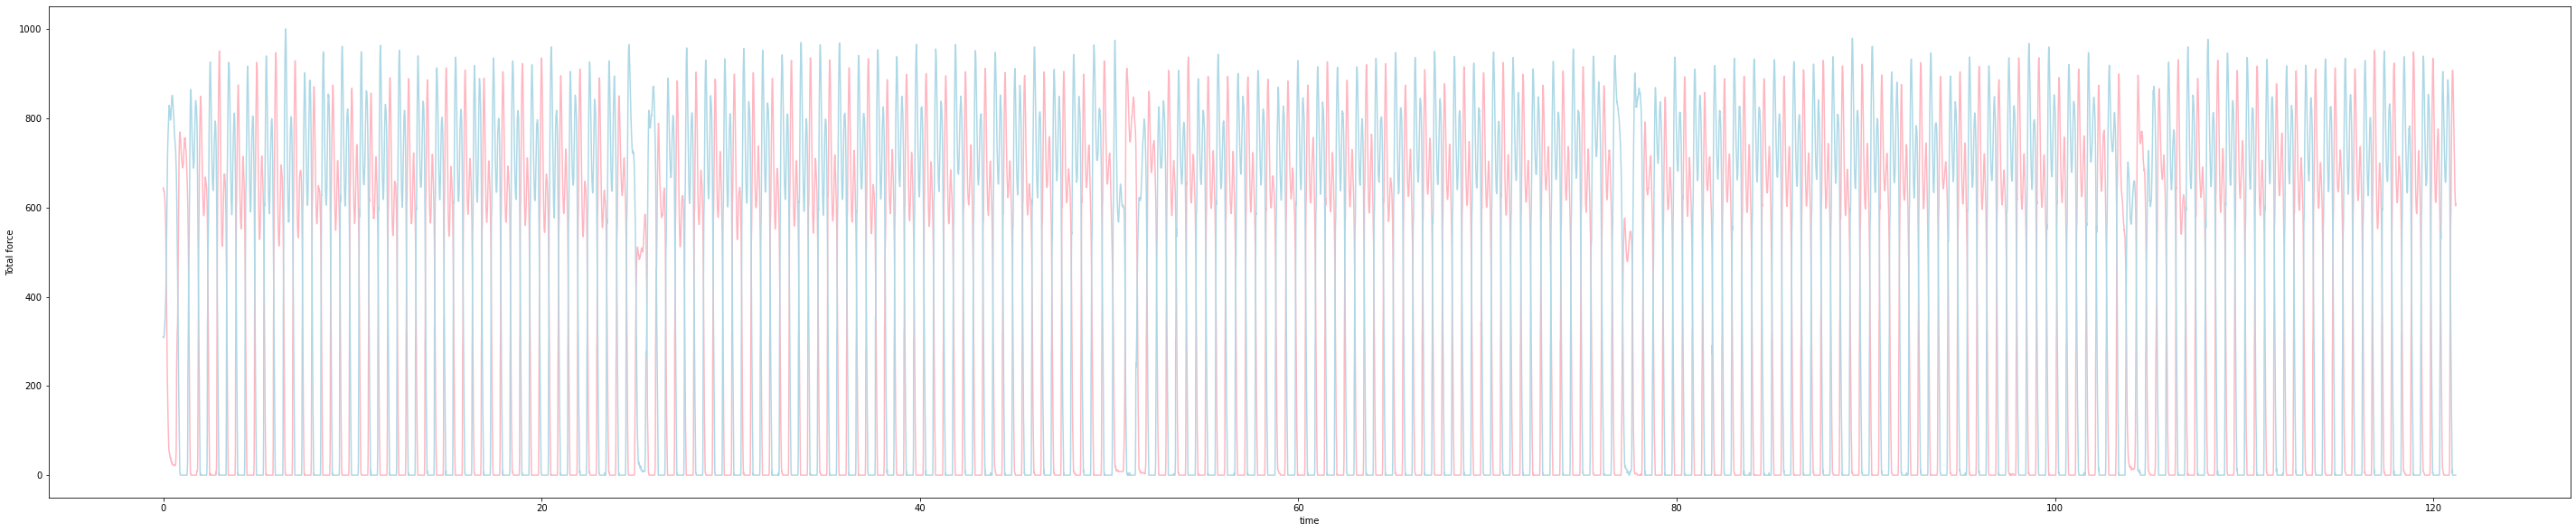

In [42]:
fig, axes = plt.subplots(figsize=(50,10))
sns.lineplot(x='time',y='total_l',data=controlsss["control3"],color='lightpink')
sns.lineplot(x='time',y='total_r',data=controlsss["control3"],color='lightblue')
plt.ylabel('Total force')

In [43]:
av5=pd.concat(controlsss,axis=1)
av5.columns = av5.columns.get_level_values(1)
av5.drop(['id'],axis=1,inplace=True)
av5['Time']=av5['time'].mean(axis=1)
av5['av_l_force']=av5['total_l'].mean(axis=1)
av5['av_r_force']=av5['total_r'].mean(axis=1)

(0.0, 121.0)

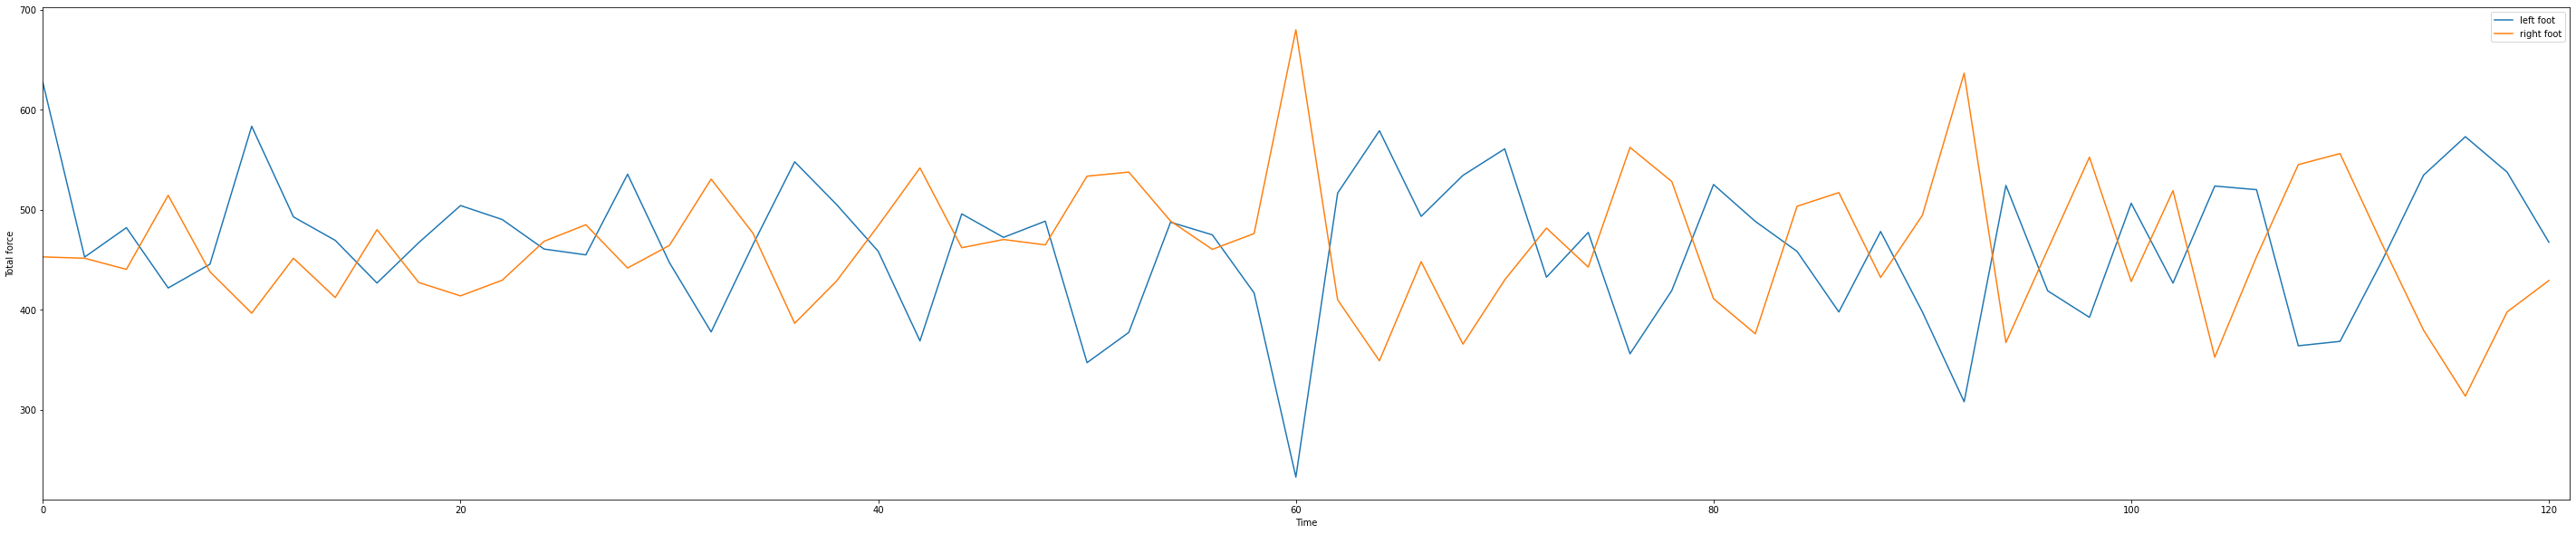

In [44]:
si_co=av5.iloc[::200,-3:]
fig, axes = plt.subplots(figsize=(50,10))
sns.lineplot(x='Time',y='av_l_force',data=si_co,label="left foot")
sns.lineplot(x='Time',y='av_r_force',data=si_co,label="right foot")
plt.ylabel('Total force')
plt.xlim(0,121)

# CO vs PD

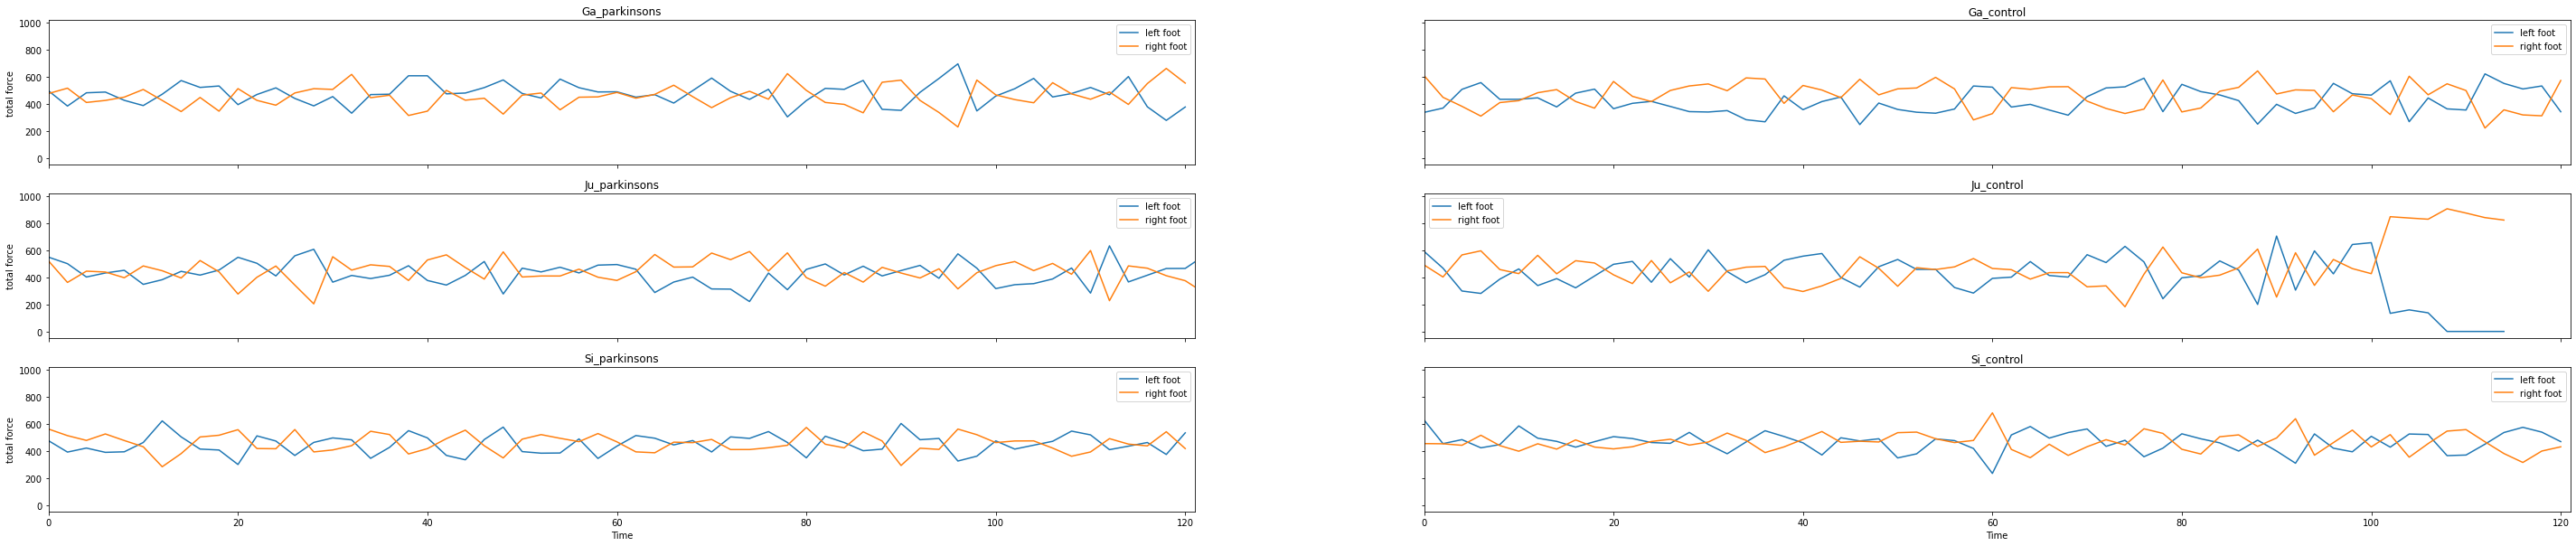

In [45]:
fig, axes = plt.subplots(3, 2,sharey=True,sharex=True,figsize=(50,10))
#Ga comparisons
sns.lineplot(x='Time',y='av_l_force',data=ga_pd,label="left foot",ax=axes[0,0]).set(ylabel='total force',title='Ga_parkinsons')
sns.lineplot(x='Time',y='av_r_force',data=ga_pd,label="right foot",ax=axes[0,0])
sns.lineplot(x='Time',y='av_l_force',data=ga_co,label="left foot",ax=axes[0,1]).set(ylabel='total force',title='Ga_control')
sns.lineplot(x='Time',y='av_r_force',data=ga_co,label="right foot",ax=axes[0,1])

#Ju comparisons 
sns.lineplot(x='Time',y='av_l_force',data=ju_pd,label="left foot",ax=axes[1,0]).set(ylabel='total force',title='Ju_parkinsons')
sns.lineplot(x='Time',y='av_r_force',data=ju_pd,label="right foot",ax=axes[1,0])
sns.lineplot(x='Time',y='av_l_force',data=ju_co,label="left foot",ax=axes[1,1]).set(ylabel='total force',title='Ju_control')
sns.lineplot(x='Time',y='av_r_force',data=ju_co,label="right foot",ax=axes[1,1])

#Si comparisons 
sns.lineplot(x='Time',y='av_l_force',data=si_pd,label="left foot",ax=axes[2,0]).set(ylabel='total force',title='Si_parkinsons')
sns.lineplot(x='Time',y='av_r_force',data=si_pd,label="right foot",ax=axes[2,0])
sns.lineplot(x='Time',y='av_l_force',data=si_co,label="left foot",ax=axes[2,1]).set(ylabel='total force',title='Si_control')
sns.lineplot(x='Time',y='av_r_force',data=si_co,label="right foot",ax=axes[2,1])
plt.xlim(0,121)

plt.savefig("gait_group_graphs")

In [46]:
import matplotlib.image as mpimg
image = mpimg.imread("si_co_graph.png")
plt.imshow(image)
plt.show()

FileNotFoundError: [Errno 2] No such file or directory: 'si_co_graph.png'